In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

import os
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [8]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

In [9]:
class_names = train_data.classes
len(train_data), len(test_data), class_names

(60000,
 10000,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [10]:
image, label = train_data[0]
image.shape, label

print(iter)

<built-in function iter>


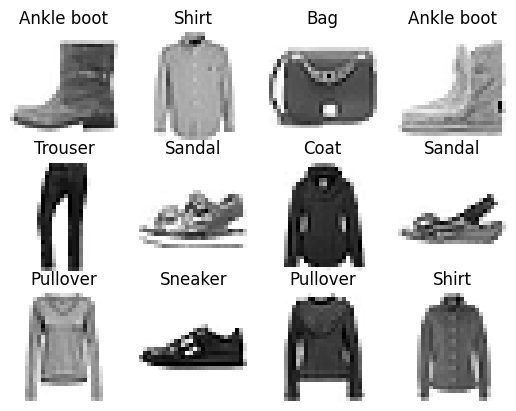

In [11]:
# plt.imshow(image[0, 5:6, :])
torch.manual_seed(42)

rows, cols = 3, 4
for i in range(cols*rows):
    random_idx = torch.randint(0, len(train_data), size=[1])
    image, label = train_data[random_idx.item()]
    plt.subplot(rows, cols, i+1)
    plt.imshow(image.permute(1, 2, 0), cmap='binary')
    plt.title(class_names[label])
    plt.axis(False)

In [12]:
BATCH_SIZE = 32

train_loader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)
test_loader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

In [13]:
len(train_loader)

1875

In [14]:
# train_features_batch, train_labels_batch = next(iter(train_loader))
# train_features_batch.shape, train_labels_batch.shape

In [15]:
# for i in range(len(train_features_batch)):
#     train_feature = train_features_batch[i]
#     train_label = train_labels_batch[i]
#     plt.subplot(8, 4, i+1)
#     plt.imshow(train_feature.permute(1,2,0), cmap='binary')
#     plt.title(class_names[train_label.item()])
#     plt.axis(False)
#     plt.tight_layout()
    

In [16]:
class FashionMNISTModel0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
            ),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
            ),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7,
                out_features=output_shape,
            ),
        )

        self.final_stack = nn.Sequential(
            self.conv_block_1,
            self.conv_block_2,
            self.classifier,
        )

    def forward(self, x):
        # print(x.shape)
        # x = self.conv_block_1(x)
        # print(x.shape)
        # x = self.conv_block_2(x)
        # print(x.shape)
        # x = self.classifier(x)
        # return x
        return self.final_stack(x)

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if torch.cuda.is_available():
    torch.cuda.empty_cache()

device = 'cpu'
device


'cpu'

In [18]:
torch.manual_seed(42)

model_0 = FashionMNISTModel0(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names),
).to(device)

In [19]:
# torch.manual_seed(42)

# # Setup model with input parameters
# model_0 = FashionMNISTModel0(
#     input_shape=28*28, # this is 28*28
#     hidden_units=10, # how mnay units in the hidden layer
#     output_shape=len(class_names) # one for every class
# ).to("cpu")

# model_0

In [20]:
images = torch.rand([32, 3, 64, 64])
test_image = images[0]

print(f'Batch shape: {images.shape}')
print(f'Image shape: {test_image.shape}')

Batch shape: torch.Size([32, 3, 64, 64])
Image shape: torch.Size([3, 64, 64])


In [21]:
# print(f'Image shape: {image.shape}')
# test_image = torch.randn([1, 28, 28])
# print(f'Test image shape: {test_image.shape}')
# test_image = test_image.unsqueeze(0)
# print(f'Test image shape: {test_image.shape}')
# pred = model_0(image.unsqueeze(0).to(device))
# class_names[torch.argmax(pred)]

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [23]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
import time

# Set the seed and start the timer
torch.manual_seed(42)
# train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 5
test_loss = 0

start_time = time.time()

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_loader):
        model_0.train() 
        # 1. Forward pass
        train_pred = model_0(X.to(device))

        # 2. Calculate loss (per batch)
        loss = loss_fn(train_pred, y.to(device))

        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_loader.dataset)} samples. Loss: {loss:.3f}")

    # Divide total train loss by length of train train_loader (average loss per batch per epoch)
    train_loss /= len(train_loader)
    
    ### Testing
    # # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_loader:
            # 1. Forward pass
            test_pred = model_0(X.to(device))
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y.to(device)) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_score(y.cpu(), test_pred.argmax(dim=1).cpu())
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_loader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_loader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%\n")

print(f'Delay: {time.time() - start_time} s')
print(f'Device: {device}')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples. Loss: 2.301
Looked at 12800/60000 samples. Loss: 0.571
Looked at 25600/60000 samples. Loss: 0.506
Looked at 38400/60000 samples. Loss: 0.252
Looked at 51200/60000 samples. Loss: 0.373


 20%|██        | 1/5 [00:24<01:39, 24.96s/it]


Train loss: 0.59672 | Test loss: 0.39416, Test acc: 85.93%

Epoch: 1
-------
Looked at 0/60000 samples. Loss: 0.352
Looked at 12800/60000 samples. Loss: 0.750
Looked at 25600/60000 samples. Loss: 0.264
Looked at 38400/60000 samples. Loss: 0.406
Looked at 51200/60000 samples. Loss: 0.200


 40%|████      | 2/5 [00:51<01:18, 26.01s/it]


Train loss: 0.35866 | Test loss: 0.35538, Test acc: 86.67%

Epoch: 2
-------
Looked at 0/60000 samples. Loss: 0.342
Looked at 12800/60000 samples. Loss: 0.458
Looked at 25600/60000 samples. Loss: 0.221
Looked at 38400/60000 samples. Loss: 0.370
Looked at 51200/60000 samples. Loss: 0.193


 60%|██████    | 3/5 [01:17<00:51, 25.88s/it]


Train loss: 0.32267 | Test loss: 0.32060, Test acc: 88.45%

Epoch: 3
-------
Looked at 0/60000 samples. Loss: 0.217
Looked at 12800/60000 samples. Loss: 0.560
Looked at 25600/60000 samples. Loss: 0.279
Looked at 38400/60000 samples. Loss: 0.209
Looked at 51200/60000 samples. Loss: 0.793


 80%|████████  | 4/5 [01:43<00:25, 25.97s/it]


Train loss: 0.30236 | Test loss: 0.31191, Test acc: 88.57%

Epoch: 4
-------
Looked at 0/60000 samples. Loss: 0.173
Looked at 12800/60000 samples. Loss: 0.166
Looked at 25600/60000 samples. Loss: 0.264
Looked at 38400/60000 samples. Loss: 0.180
Looked at 51200/60000 samples. Loss: 0.318


100%|██████████| 5/5 [02:09<00:00, 25.88s/it]


Train loss: 0.28619 | Test loss: 0.31321, Test acc: 88.68%

Delay: 129.39855933189392 s
Device: cpu


## 15 hidden layers
CPU: 34.34933876991272 s\
GPU: 53.58372449874878 s
## 150 hidden layes
CPU: 52.85621690750122 s\
GPU: 54.12273192405701 s
## 50 ** 3 hidden layers
CPU: 39.054901361465454 s\
GPU: 79.52518057823181 s


## CONV
CPU: 71.08363509178162 s\
GPU: 53.58372449874878 s



In [31]:
import random

# random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)


In [33]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [36]:
model_0.eval()
pred_probes = make_predictions(
    model_0,
    test_samples,
)




In [39]:
pred_classes = pred_probes.argmax(dim=1)
pred_classes

tensor([5, 6, 7, 4, 3, 0, 4, 7, 1])

In [38]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

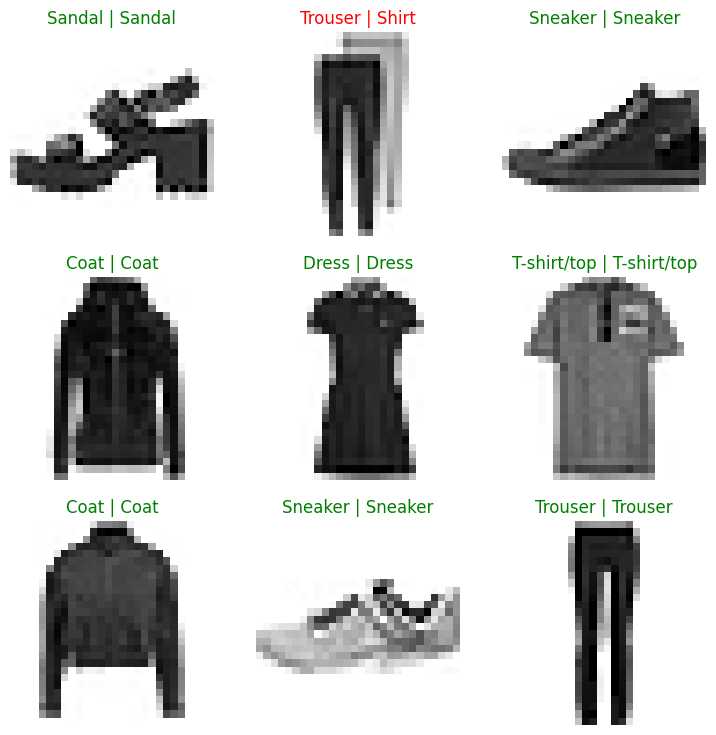

In [47]:
plt.figure(figsize=(9,9))
rows, cols = 3, 3

for i, sample in enumerate(test_samples):
    plt.subplot(rows, cols, i+1)
    plt.imshow(sample[0], cmap='binary')
    true_label = test_labels[i]
    true_label_name = class_names[true_label]

    pred_label = pred_classes[i]
    pred_label_name = class_names[pred_label]

    title = f'{true_label_name} | {pred_label_name}'
    if true_label == pred_label:
        plt.title(title, c='g')
    else:
        plt.title(title, c='r')
    plt.axis(False)